In [1]:
#import usual packages for data manipulation
import pandas as pd
import numpy as np

#import usual packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#import yfinance to get stock data
import yfinance as yf

#import quantstats to get some statistics on the stock data
import quantstats as qs

#import statistical packages
import statsmodels.api as sm
import scipy.stats as scs

#import datetime to get the current date
import datetime as dt

#set the style of the plots
plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
%conda install alpha_vantage

Retrieving notices: ...working... done
Channels:
 - defaults
 - conda-forge
 - pytorch
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3/envs/erdos_may_2024

  added / updated specs:
    - alpha_vantage


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    alpha_vantage-3.0.0        |     pyhd8ed1ab_0          24 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          24 KB

The following NEW packages will be INSTALLED:

  alpha_vantage      conda-forge/noarch::alpha_vantage-3.0.0-pyhd8ed1ab_0 



                                                                                
Preparing transaction: done
Verifying transaction: | WARNING conda.core.path_actions:verify(1055): Unable to create environments file. Path not writable.
  environment location: /U

In [14]:
my_key = 'DJ3QKKTFZ5J298QY'

#import class AlphaIntelligence from the module alphaintelligence
from alpha_vantage.alphaintelligence import AlphaIntelligence

In [16]:
#initialize the class AlphaIntelligence with the API key
ai = AlphaIntelligence(key=my_key,
                       output_format='pandas',
                       indexing_type='date')
ai

In [29]:
#get news sentiment data for the last two years. Limit the number of news to 1000.
news_data, meta_data = ai.get_news_sentiment(tickers='AAPL',
                                  time_from='20220810T0130', 
                                  limit=1000)

In [32]:
news_data.head()

,title,url,time_published,authors,summary,banner_image,source,category_within_source,source_domain,topics,overall_sentiment_score,overall_sentiment_label,ticker_sentiment
date,,,,,,,,,,,,,
1970-01-01 00:00:00.000000000,Consumer Tech News ( Aug 7-Aug 10 ) : Walt Di...,https://www.benzinga.com/news/24/08/40303794/c...,20240811T170019,[Lekha Gupta],Palantir Technologies Inc. PLTR reported secon...,https://cdn.benzinga.com/files/images/story/20...,Benzinga,News,www.benzinga.com,"[{'topic': 'Manufacturing', 'relevance_score':...",0.077353,Neutral,"[{'ticker': 'MSFT', 'relevance_score': '0.2535..."
1970-01-01 00:00:00.000000001,Should Apple Acquire Peloton in 2024? 2 Things...,https://www.fool.com/investing/2024/08/11/appl...,20240811T163000,[Neil Patel],The tech titan would be Peloton's white knight.,https://g.foolcdn.com/editorial/images/786311/...,Motley Fool,n/a,www.fool.com,"[{'topic': 'Earnings', 'relevance_score': '0.3...",0.224844,Somewhat-Bullish,"[{'ticker': 'AAPL', 'relevance_score': '0.8581..."
1970-01-01 00:00:00.000000002,Google Is Ruled a Monopoly. Should Investors D...,https://www.fool.com/investing/2024/08/11/is-a...,20240811T145300,[Geoffrey Seiler],Why dumping the stock may not be a good idea.,https://g.foolcdn.com/image/?url=https%3A%2F%2...,Motley Fool,n/a,www.fool.com,"[{'topic': 'Earnings', 'relevance_score': '0.5...",0.107870,Neutral,"[{'ticker': 'MSFT', 'relevance_score': '0.3470..."
1970-01-01 00:00:00.000000003,Warren Buffett Declares Shift: Selling Apple S...,https://www.benzinga.com/markets/24/08/4030341...,20240811T144519,[LaToya Scott],"Warren Buffett, arguably America's most succes...",https://cdn.benzinga.com/files/images/story/20...,Benzinga,Markets,www.benzinga.com,"[{'topic': 'IPO', 'relevance_score': '0.158519...",0.237613,Somewhat-Bullish,"[{'ticker': 'XIACY', 'relevance_score': '0.060..."
1970-01-01 00:00:00.000000004,"Arm Holdings Plummets 40% Amid the Sell-Off, I...",https://www.fool.com/investing/2024/08/11/arm-...,20240811T144000,[Bradley Guichard],Arm has terrific results and an awesome busine...,https://media.ycharts.com/charts/3e52d9a64a560...,Motley Fool,n/a,www.fool.com,"[{'topic': 'IPO', 'relevance_score': '0.158519...",0.244481,Somewhat-Bullish,"[{'ticker': 'SSNLF', 'relevance_score': '0.064..."


In [33]:
news_data.columns

Index(['title', 'url', 'time_published', 'authors', 'summary', 'banner_image',
       'source', 'category_within_source', 'source_domain', 'topics',
       'overall_sentiment_score', 'overall_sentiment_label',
       'ticker_sentiment'],
      dtype='object')

In [35]:
list(news_data['ticker_sentiment'].values)

[[{'ticker': 'MSFT',
   'relevance_score': '0.253514',
   'ticker_sentiment_score': '0.104171',
   'ticker_sentiment_label': 'Neutral'},
  {'ticker': 'SNEJF',
   'relevance_score': '0.102888',
   'ticker_sentiment_score': '0.244637',
   'ticker_sentiment_label': 'Somewhat-Bullish'},
  {'ticker': 'GOOG',
   'relevance_score': '0.204072',
   'ticker_sentiment_score': '0.052393',
   'ticker_sentiment_label': 'Neutral'},
  {'ticker': 'META',
   'relevance_score': '0.102888',
   'ticker_sentiment_score': '0.165482',
   'ticker_sentiment_label': 'Somewhat-Bullish'},
  {'ticker': 'NVDA',
   'relevance_score': '0.102888',
   'ticker_sentiment_score': '-0.215333',
   'ticker_sentiment_label': 'Somewhat-Bearish'},
  {'ticker': 'AAPL',
   'relevance_score': '0.153797',
   'ticker_sentiment_score': '0.25674',
   'ticker_sentiment_label': 'Somewhat-Bullish'},
  {'ticker': 'CRWD',
   'relevance_score': '0.153797',
   'ticker_sentiment_score': '-0.006704',
   'ticker_sentiment_label': 'Neutral'},
  {

In [36]:
len(news_data)

683

<Axes: xlabel='overall_sentiment_score', ylabel='Count'>

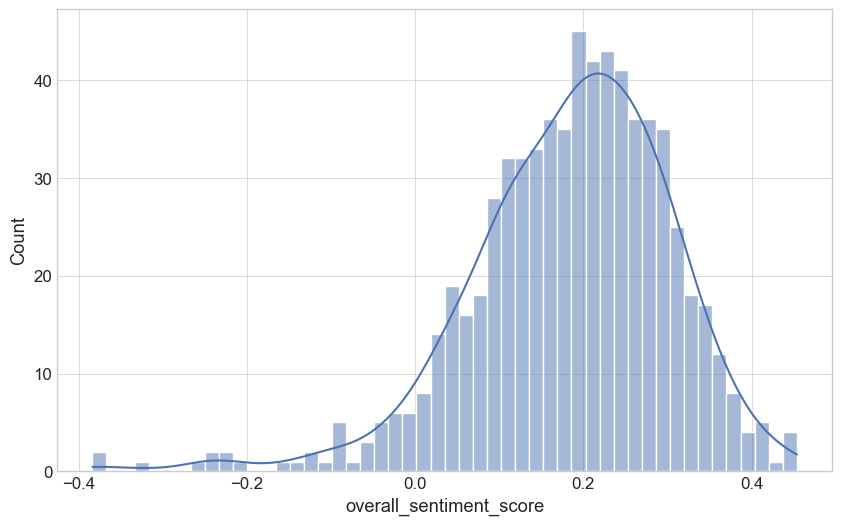

In [39]:
#plot a histogram of the sentiment scores
plt.figure(figsize=(10,6))
sns.histplot(news_data['overall_sentiment_score'], bins=50, kde=True)

In [40]:
news_data.tail()

,title,url,time_published,authors,summary,banner_image,source,category_within_source,source_domain,topics,overall_sentiment_score,overall_sentiment_label,ticker_sentiment
date,,,,,,,,,,,,,
1970-01-01 00:00:00.000000678,Apple Poised For Revenue Boost: Analyst Sees A...,https://www.benzinga.com/analyst-ratings/analy...,20240710T184814,[Surbhi Jain],Apple Inc. AAPL is not just coasting on its ic...,https://cdn.benzinga.com/files/images/story/20...,Benzinga,Trading,www.benzinga.com,"[{'topic': 'Earnings', 'relevance_score': '0.9...",0.362916,Bullish,"[{'ticker': 'AAPL', 'relevance_score': '0.7394..."
1970-01-01 00:00:00.000000679,Samsung Takes On Apple With New Galaxy Ring An...,https://www.benzinga.com/news/24/07/39716525/s...,20240710T184327,[Shivani Kumaresan],Samsung Electronics Co Ltd SSNLF is stepping u...,https://cdn.benzinga.com/files/images/story/20...,Benzinga,General,www.benzinga.com,"[{'topic': 'Technology', 'relevance_score': '1...",0.271440,Somewhat-Bullish,"[{'ticker': 'SSNLF', 'relevance_score': '0.575..."
1970-01-01 00:00:00.000000680,"Microsoft, Apple drop OpenAI board seat plans ...",https://www.business-standard.com/technology/t...,20240710T180659,[Bloomberg],Microsoft Corp. and Apple Inc. dropped plans t...,https://bsmedia.business-standard.com/_media/b...,Business Standard,GoogleRSS,www.business-standard.com,"[{'topic': 'Technology', 'relevance_score': '0...",0.090407,Neutral,"[{'ticker': 'MSFT', 'relevance_score': '0.4950..."
1970-01-01 00:00:00.000000681,Arm Holdings ( ARM ) Hits 52-Week High: What...,https://www.zacks.com/stock/news/2299502/arm-h...,20240710T173200,[Shuvra Shankar Dey],Given the recent surge in Arm Holdings (ARM) s...,https://staticx-tuner.zacks.com/images/article...,Zacks Commentary,n/a,www.zacks.com,"[{'topic': 'IPO', 'relevance_score': '0.158519...",0.413174,Bullish,"[{'ticker': 'NVDA', 'relevance_score': '0.1460..."
1970-01-01 00:00:00.000000682,"2024: Top-Heavy, AI-Fueled, Supply-Constrained",https://www.fool.com/investing/2024/07/10/2024...,20240710T164300,[Motley Fool Staff],It's Motley Fool Money's midyear review show! ...,https://g.foolcdn.com/editorial/images/782781/...,Motley Fool,n/a,www.fool.com,"[{'topic': 'Life Sciences', 'relevance_score':...",0.095390,Neutral,"[{'ticker': 'NFLX', 'relevance_score': '0.0059..."


In [43]:
earnings_news, earnings_meta_data = ai.get_news_sentiment(topics='earnings',
                                                         time_from='20220101T0100',
                                                         limit=1000)

In [45]:
len(earnings_news)

1000

In [46]:
earnings_news.tail()

,title,url,time_published,authors,summary,banner_image,source,category_within_source,source_domain,topics,overall_sentiment_score,overall_sentiment_label,ticker_sentiment
date,,,,,,,,,,,,,
1970-01-01 00:00:00.000000995,Trump Media reports $16 million loss for quart...,https://www.cnbc.com/2024/08/09/trump-media-re...,20240809T210013,[],"Donald Trump, the majority owner of Trump Medi...",None,CNBC,Top News,www.cnbc.com,"[{'topic': 'Earnings', 'relevance_score': '0.3...",0.131409,Neutral,[]
1970-01-01 00:00:00.000000996,"ZyVersa Therapeutics Reports Second Quarter, 2...",https://www.globenewswire.com/news-release/202...,20240809T204000,[ZyVersa Therapeutics],KEY HIGHLIGHTS ...,https://ml.globenewswire.com/Resource/Download...,GlobeNewswire,n/a,www.globenewswire.com,"[{'topic': 'Earnings', 'relevance_score': '0.3...",0.075903,Neutral,"[{'ticker': 'ZVSA', 'relevance_score': '0.1085..."
1970-01-01 00:00:00.000000997,"XPEL, Inc. ( XPEL ) Investigation: Bronstein...",https://www.benzinga.com/pressreleases/24/08/g...,20240809T200000,[Globe Newswire],"NEW YORK, Aug. 09, 2024 ( GLOBE NEWSWIRE ) -- ...",https://www.benzinga.com/next-assets/images/sc...,Benzinga,News,www.benzinga.com,"[{'topic': 'Earnings', 'relevance_score': '0.3...",0.127391,Neutral,[]
1970-01-01 00:00:00.000000998,Smart Money Is Betting Big In Micron Technolog...,https://www.benzinga.com/insights/options/24/0...,20240809T190149,[Benzinga Insights],Whales with a lot of money to spend have taken...,https://www.benzinga.com/files/images/story/20...,Benzinga,Markets,www.benzinga.com,"[{'topic': 'Earnings', 'relevance_score': '0.3...",0.191997,Somewhat-Bullish,"[{'ticker': 'MU', 'relevance_score': '0.565003..."
1970-01-01 00:00:00.000000999,Unpacking the Latest Options Trading Trends in...,https://www.benzinga.com/insights/options/24/0...,20240809T181615,[Benzinga Insights],High-rolling investors have positioned themsel...,https://www.benzinga.com/files/images/story/20...,Benzinga,Markets,www.benzinga.com,"[{'topic': 'Earnings', 'relevance_score': '0.3...",0.230372,Somewhat-Bullish,"[{'ticker': 'BYND', 'relevance_score': '0.7318..."


In [47]:
#get aapl earnings data 
from alpha_vantage.fundamentaldata import FundamentalData
fd = FundamentalData(key=my_key)

In [50]:
test_earnings, test_earnings_meta_data = fd.get_earnings_quarterly(symbol='AAPL')

In [54]:
test_earnings.head(30)

,fiscalDateEnding,reportedDate,reportedEPS,estimatedEPS,surprise,surprisePercentage,reportTime
0,2024-06-30,2024-08-01,1.4,1.35,0.05,3.7037,post-market
1,2024-03-31,2024-05-02,1.53,1.5,0.03,2,post-market
2,2023-12-31,2024-02-01,2.18,2.1,0.08,3.8095,post-market
3,2023-09-30,2023-11-02,1.46,1.39,0.07,5.036,post-market
4,2023-06-30,2023-08-03,1.26,1.19,0.07,5.8824,post-market
5,2023-03-31,2023-05-04,1.52,1.43,0.09,6.2937,post-market
6,2022-12-31,2023-02-02,1.88,1.94,-0.06,-3.0928,post-market
7,2022-09-30,2022-10-27,1.29,1.27,0.02,1.5748,post-market
8,2022-06-30,2022-07-28,1.2,1.16,0.04,3.4483,post-market
9,2022-03-31,2022-04-28,1.52,1.43,0.09,6.2937,post-market


In [55]:
aapl_cashflow = fd.get_cash_flow_quarterly(symbol='AAPL')

In [62]:
list(aapl_cashflow)

[   fiscalDateEnding reportedCurrency operatingCashflow  \
 0        2024-06-30              USD       28858000000   
 1        2024-03-31              USD       22690000000   
 2        2023-12-31              USD       39895000000   
 3        2023-09-30              USD       21598000000   
 4        2023-06-30              USD       26380000000   
 ..              ...              ...               ...   
 56       2010-09-30              USD        5683000000   
 57       2010-06-30              USD        4801000000   
 58       2010-03-31              USD        2330000000   
 59       2009-12-31              USD        5781000000   
 60       2009-09-30              USD        3110000000   
 
    paymentsForOperatingActivities proceedsFromOperatingActivities  \
 0                            None                            None   
 1                            None                            None   
 2                            None                            None   
 3        

In [67]:
aapl_cashflow = aapl_cashflow[0]
aapl_cashflow.head(30)

,fiscalDateEnding,reportedCurrency,operatingCashflow,paymentsForOperatingActivities,proceedsFromOperatingActivities,changeInOperatingLiabilities,changeInOperatingAssets,depreciationDepletionAndAmortization,capitalExpenditures,changeInReceivables,...,dividendPayoutCommonStock,dividendPayoutPreferredStock,proceedsFromIssuanceOfCommonStock,proceedsFromIssuanceOfLongTermDebtAndCapitalSecuritiesNet,proceedsFromIssuanceOfPreferredStock,proceedsFromRepurchaseOfEquity,proceedsFromSaleOfTreasuryStock,changeInCashAndCashEquivalents,changeInExchangeRate,netIncome
0,2024-06-30,USD,28858000000,None,None,4978000000,3294000000,2850000000,2151000000,2094000000,...,3895000000,None,None,0,None,-26522000000,None,None,None,21448000000
1,2024-03-31,USD,22690000000,None,None,-11740000000,-5976000000,2836000000,1996000000,-8767000000,...,3710000000,None,None,0,None,-23205000000,None,None,None,23636000000
2,2023-12-31,USD,39895000000,None,None,-8407000000,-9530000000,2848000000,2392000000,-11124000000,...,3825000000,None,None,0,None,-20139000000,None,None,None,33916000000
3,2023-09-30,USD,21598000000,3113000000,None,14946000000,21006000000,2653000000,2163000000,21137000000,...,3758000000,None,0,0,None,-21003000000,None,839000000,None,22956000000
4,2023-06-30,USD,26380000000,None,None,5203000000,4454000000,3052000000,2093000000,3661000000,...,3849000000,None,0,0,None,0,None,2769000000,None,19881000000
5,2023-03-31,USD,28560000000,None,None,-16821000000,-17052000000,2898000000,2916000000,-17786000000,...,3650000000,None,None,None,None,-19594000000,None,5155000000,None,24160000000
6,2023-03-31,USD,28560000000,None,None,None,None,2898000000,2916000000,17786000000,...,3650000000,None,0,0,None,0,None,5155000000,None,24160000000
7,2022-12-31,USD,34005000000,703000000,None,-2186000000,-689000000,2916000000,3787000000,-6595000000,...,3768000000,None,0,0,None,-19475000000,None,-3003000000,None,29998000000
8,2022-09-30,USD,24127000000,2755000000,None,21420000000,21468000000,2865000000,3289000000,18693000000,...,3703000000,None,None,5465000000,None,-24428000000,None,-3884000000,None,20721000000
9,2022-06-30,USD,22892000000,504000000,None,-6627000000,-3402000000,2805000000,2102000000,-3165000000,...,3811000000,None,None,0,None,-21865000000,None,19442000000,None,19442000000


In [68]:
aapl_balance_sheet , _ = fd.get_balance_sheet_quarterly(symbol='AAPL')
aapl_balance_sheet

,fiscalDateEnding,reportedCurrency,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,...,currentLongTermDebt,longTermDebtNoncurrent,shortLongTermDebtTotal,otherCurrentLiabilities,otherNonCurrentLiabilities,totalShareholderEquity,treasuryStock,retainedEarnings,commonStock,commonStockSharesOutstanding
0,2024-06-30,USD,331612000000,125435000000,25565000000,61801000000,6165000000,43172000000,206177000000,44502000000,...,12114000000,86196000000,101294000000,60889000000,47084000000,66708000000,None,-4726000000,79850000000,15222259000
1,2024-03-31,USD,337411000000,128416000000,32695000000,67150000000,6232000000,41150000000,208995000000,43546000000,...,10762000000,91831000000,104597000000,57298000000,47564000000,74194000000,None,4339000000,78815000000,15337686000
2,2023-12-31,USD,353514000000,143692000000,40760000000,73100000000,6511000000,50102000000,209822000000,43666000000,...,10954000000,95088000000,107998000000,54611000000,50353000000,74100000000,None,8242000000,75236000000,15460223000
3,2023-09-30,USD,352583000000,143566000000,29965000000,61555000000,6331000000,60985000000,209017000000,43715000000,...,9822000000,95281000000,111088000000,58829000000,49848000000,62146000000,None,-214000000,73812000000,15550061000
4,2023-06-30,USD,335038000000,122659000000,28408000000,62482000000,7351000000,39186000000,212379000000,43550000000,...,7216000000,98071000000,109293000000,58897000000,51730000000,60274000000,None,1408000000,70667000000,15647868000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2010-06-30,USD,64725000000,36033000000,9705000000,24288000000,942000000,3447000000,48281000000,2028000000,...,None,None,None,4452000000,4981000000,43111000000,None,32870000000,10133000000,913482347
57,2010-03-31,USD,57057000000,32336000000,10018000000,23155000000,638000000,2886000000,39766000000,3504000000,...,None,None,None,4021000000,4539000000,39348000000,None,29670000000,9553000000,909635811
58,2009-12-31,USD,53926000000,33332000000,7609000000,24796000000,576000000,3090000000,32503000000,3115000000,...,None,None,None,3996000000,4139000000,35768000000,None,26695000000,8962000000,906282182
59,2009-09-30,USD,47501000000,31555000000,5263000000,23464000000,455000000,3361000000,23520000000,1780000000,...,None,None,None,3376000000,3502000000,31640000000,None,23353000000,8210000000,899805500


In [69]:
aapl_income_statement, _ = fd.get_income_statement_quarterly(symbol='AAPL')
aapl_income_statement

,fiscalDateEnding,reportedCurrency,grossProfit,totalRevenue,costOfRevenue,costofGoodsAndServicesSold,operatingIncome,sellingGeneralAndAdministrative,researchAndDevelopment,operatingExpenses,...,depreciation,depreciationAndAmortization,incomeBeforeTax,incomeTaxExpense,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome
0,2024-06-30,USD,39678000000,85777000000,52419000000,46099000000,25352000000,6320000000,8006000000,14326000000,...,None,2850000000,25494000000,4046000000,None,21448000000,21992000000,25352000000,28202000000,21448000000
1,2024-03-31,USD,42271000000,90753000000,54950000000,48482000000,27900000000,6468000000,7903000000,14371000000,...,None,2836000000,28058000000,4422000000,None,23636000000,24054000000,27900000000,30736000000,23636000000
2,2023-12-31,USD,54855000000,119575000000,71506000000,64720000000,40373000000,6786000000,7696000000,14482000000,...,None,2848000000,40323000000,6407000000,None,33916000000,35990000000,40373000000,43221000000,33916000000
3,2023-09-30,USD,40427000000,88496000000,55222000000,49071000000,26969000000,6151000000,7307000000,13458000000,...,None,2653000000,26998000000,4042000000,1002000000,22956000000,23305000000,28000000000,29622000000,22956000000
4,2023-06-30,USD,36413000000,80799000000,51357000000,45384000000,22998000000,5973000000,7442000000,13415000000,...,None,3052000000,22733000000,2852000000,998000000,19881000000,19826000000,23731000000,26050000000,19881000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,2009-06-30,USD,3983000000,8337000000,5314000000,5751000000,2632000000,1010000000,341000000,1351000000,...,None,176000000,2692000000,864000000,None,1229000000,1900000000,2632000000,1672000000,1828000000
61,2009-03-31,USD,3627000000,8163000000,5192000000,5457000000,2323000000,985000000,319000000,1304000000,...,None,172000000,2386000000,766000000,None,None,None,2323000000,1839000000,1620000000
62,2008-12-31,USD,4507000000,10167000000,6635000000,7373000000,3101000000,1091000000,315000000,1406000000,...,None,158000000,3259000000,1004000000,None,None,None,3101000000,2284000000,2255000000
63,2008-09-30,USD,4791000000,7895000000,5156000000,8116000000,3494000000,999000000,298000000,1297000000,...,None,134000000,3634000000,1213000000,None,None,None,3494000000,1576000000,2421000000


In [70]:
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key=my_key, output_format='pandas')

In [71]:
#save the dataframes above to csv files
aapl_balance_sheet.to_csv('../data/aapl_balance_sheet.csv')
aapl_income_statement.to_csv('../data/aapl_income_statement.csv')
aapl_cashflow.to_csv('../data/aapl_cashflow.csv')
news_data.to_csv('../data/aapl_news_data.csv')
test_earnings.to_csv('../data/aapl_earnings.csv')
earnings_news.to_csv('../data/earnings_news.csv')